In [356]:
# #### CONISGNA

# Tu tarea: ¡Crea el gráfico de la derecha! Debes implementar un juego automático de Mayor o Menor.

# Establece los límites entre 1 y 20. El gráfico debe seguir adivinando (el número máximo de intentos es 7). Si la adivinanza es correcta, se detiene; de ​​lo contrario, continúa el bucle hasta alcanzar el límite máximo de 7.

# Cada vez que se adivina un número, el nodo de pista debe indicar "mayor" o "menor", y el gráfico debe tener en cuenta esta información y adivinar el siguiente número en consecuencia.

# Entrada: {"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1,

# "upper_bound": 20}
# Pista: Deberá ajustar sus límites después de cada intento según la pista proporcionada por el nodo de pista.

In [357]:
from typing import TypedDict, Dict, List
import random
import math
from langgraph.graph import StateGraph, START, END
import pandas as pd
import numpy as np


In [358]:
class AgentState(TypedDict) :
    player_name: str
    guesses: List[int] #como lista para guardar todos los intentos con append.
    attempts: int
    lower_bounds: int
    upper_bounds: int
    target_number: int
    hint: str


In [359]:
# Voy a necesitar los siguientes nodes:
# 1) node_setup: aca necesito la FUNCTION de generar el random (int) entre 1 y 20
# 2) node_guess: aca necesito la FUNCTION de aplicar la logica de promedio entre el rango, otra FUNCTION que ajuste el rango
# 3) hit_node: aca necesito 
#    a)la FUNCTION condicional para compara el number_correct vs el numero generado por guesses
#    b)la FUNCTION de contador para corrobar que el intento actual sea < 8 o = 7

# voy a necesitar las siguientes edges:
#   1) edge START_setup, edge setup_guesses, edge guesses_hit_node

# voy a necesitar el edge conditional
#   1) hit_node -> continue
#   2) hit_node -> END


In [360]:
# functions

def setup_function (state: AgentState) -> AgentState:
    """Esta funcion genera un random, que es el secret_number a adivinar."""
    state["target_number"] = random.randint(1, 20)   
    state["guesses"] :[]
    state["attempts"]: 0
    state["lower_bounds"]: 1
    state["upper_bounds"]: 20
    print(f"Bienvenido, {state["player_name"]}! El numero objetivo ya se genero: {state["target_number"]}, que comience el juego")
    return state

def guesses_function (state:AgentState) -> AgentState:
    """Esta funcion calcula el numero promedio del rango entre lower_bond y upper_bond.
    Luego guarda ese numero intentado en la lista guesses."""
    guess = int(np.average([state["lower_bounds"], state["upper_bounds"]])) #o (state["lower_bonds"] + state["upper_bonds"])//2 o math.floorstate["lower_bonds"] + state["upper_bonds"])/2
    state["guesses"].append(guess)  #lo agrego al historial
    state["attempts"]+=1
    print(f"Intento: {state["attempts"]}, Numero elegido: {state["guesses"][-1]}, Numeros intentados: {state["guesses"]}, Rango: {state["lower_bounds"]} - {state["upper_bounds"]} ")
    return state


def hit_function (state:AgentState) -> AgentState:
    """En esta funcion tengo que: 
    a) Comparar el guesses con el number_target
    b) Imprimr si es mas grande o mas chico
    c) Actualizar el rango"""
    if state["guesses"][-1] == state["target_number"]:
        state["hint"] = f"El numero adivinado: {state['guesses'][-1]} es el correcto."
         
    elif state["guesses"][-1] < state["target_number"]:
        state["hint"] = f"El numero sugerido: {state['guesses'][-1]} es mas chico. Inetnta con una mas grande."
        state["lower_bounds"] = max(state["lower_bounds"], (state["guesses"][-1]+1))
        print(state["hint"])

    else:
        #state["guesses"][-1] > state["target_number"]
        state["hint"] = f"El numero sugerido: {state['guesses'][-1]} es muy grande. Inetnta con una mas chico."
        state["upper_bounds"] = min(state["upper_bounds"] ,(state["guesses"][-1] -1))
        print(state["hint"])
        
    return state


def attempsts_function (state:AgentState) -> str:
    """Esta funcion va calculado la cantidad de intentos, que debe ser hasta 7.
    Se inicializa en 0 para evitar errores por si ingresan un cantidad de attepms negativa."""
    if state["guesses"][-1] == state["target_number"]:
        print(f"El numero {state['guesses'][-1]} es correcto.")
        return "end_edge"
    elif state["attempts"] > 7: 
        print(f"El numero de intentos supero el limite de {state["attempts"]}")
        return "end_edge"
    else:
        print(f"Se continua, el numero de intentos usados es {state["attempts"]}/7.")
        return "continue_edge"
    #esto lo voy a usar en los edges_conditionals




In [361]:
graph = StateGraph(AgentState)

#nodes
graph.add_node("setup", setup_function)
graph.add_node("guesses", guesses_function)
graph.add_node("hit_node", hit_function)

#edges
graph.add_edge(START, "setup")
graph.add_edge("setup", "guesses")
graph.add_edge("guesses","hit_node")

#conditional_edges
graph.add_conditional_edges(
    "hit_node",
    attempsts_function,
    {
        "continue_edge" : "guesses",
        "end_edge" : END
    }
)

#compile
app = graph.compile()

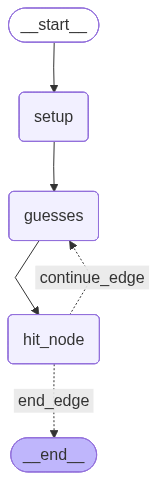

In [362]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [363]:
input = AgentState(player_name = "Luis", guesses = [], attempts = 0, lower_bounds = 1, upper_bounds = 20, hint = "")

In [364]:
output = app.invoke(input)

Bienvenido, Luis! El numero objetivo ya se genero: 14, que comience el juego
Intento: 1, Numero elegido: 10, Numeros intentados: [10], Rango: 1 - 20 
El numero sugerido: 10 es mas chico. Inetnta con una mas grande.
Se continua, el numero de intentos usados es 1/7.
Intento: 2, Numero elegido: 15, Numeros intentados: [10, 15], Rango: 11 - 20 
El numero sugerido: 15 es muy grande. Inetnta con una mas chico.
Se continua, el numero de intentos usados es 2/7.
Intento: 3, Numero elegido: 12, Numeros intentados: [10, 15, 12], Rango: 11 - 14 
El numero sugerido: 12 es mas chico. Inetnta con una mas grande.
Se continua, el numero de intentos usados es 3/7.
Intento: 4, Numero elegido: 13, Numeros intentados: [10, 15, 12, 13], Rango: 13 - 14 
El numero sugerido: 13 es mas chico. Inetnta con una mas grande.
Se continua, el numero de intentos usados es 4/7.
Intento: 5, Numero elegido: 14, Numeros intentados: [10, 15, 12, 13, 14], Rango: 14 - 14 
El numero 14 es correcto.


In [366]:
output["hint"]

'El numero adivinado: 14 es el correcto.'